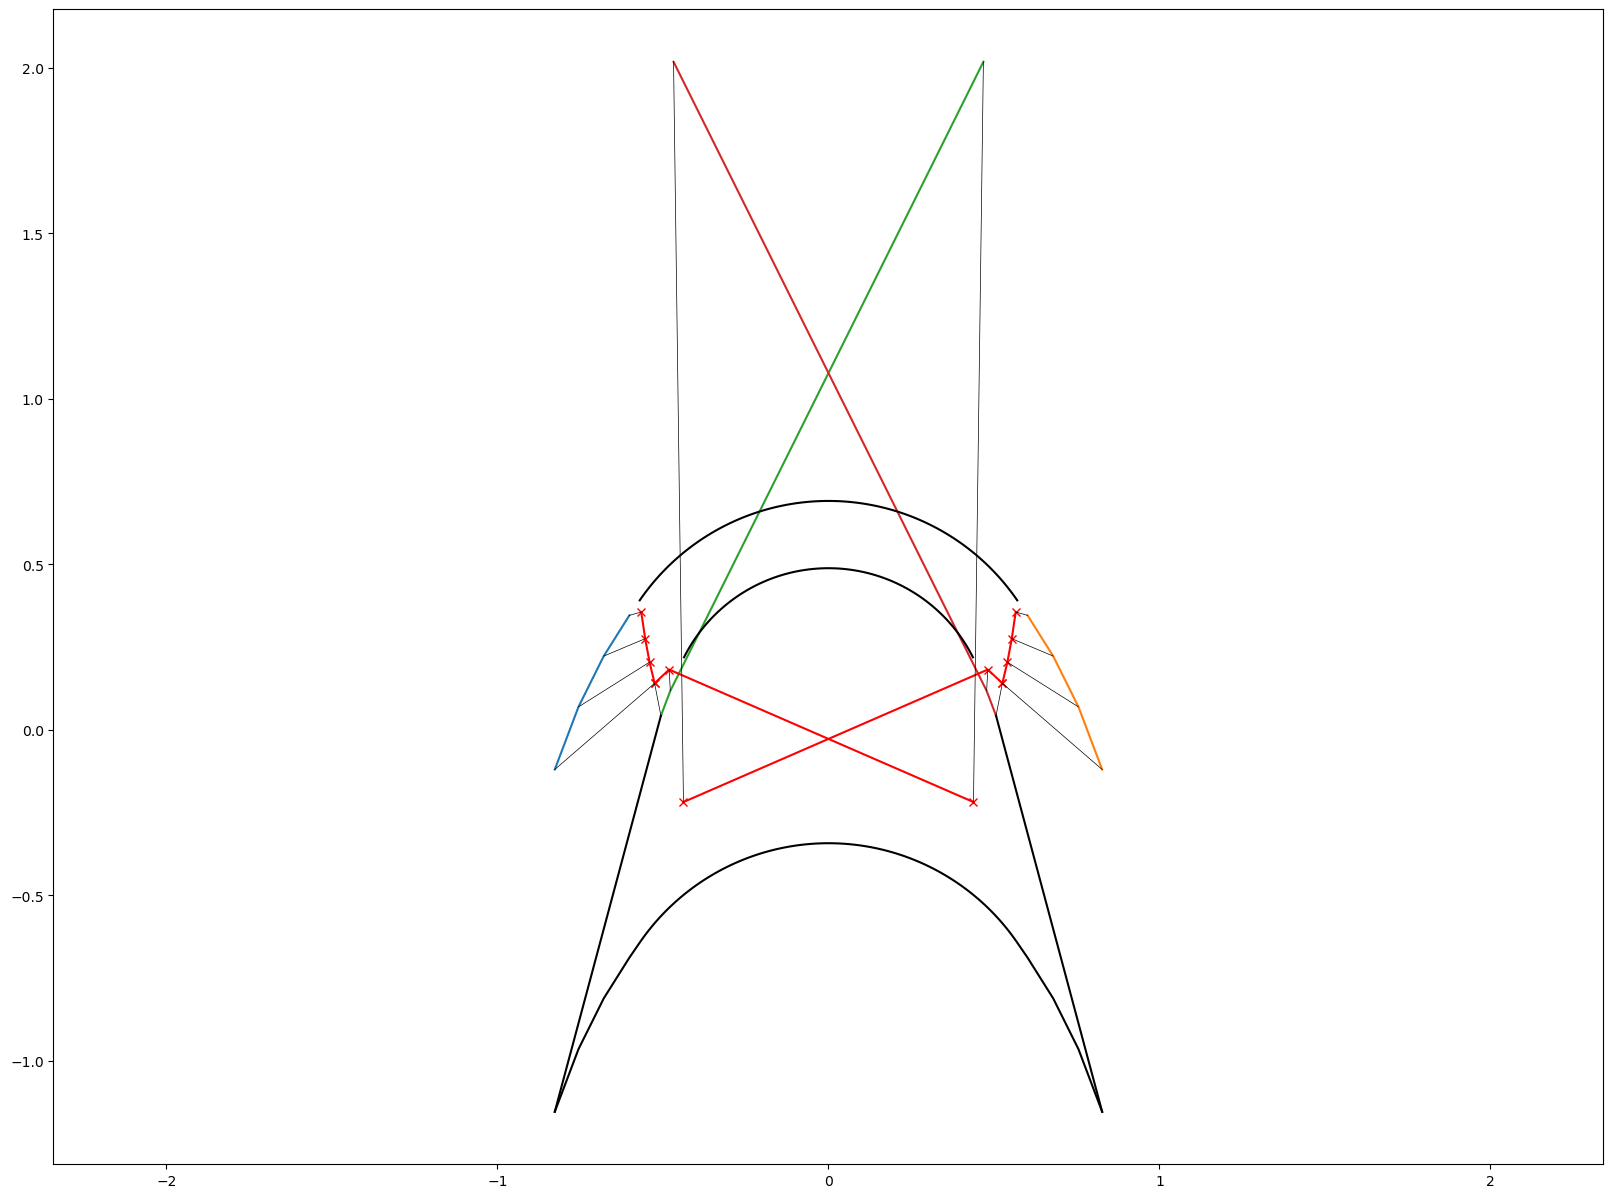

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Specific heat ratio
gamma = 1.13

# Function to calculate M* (Mach number)
def Mstar(M):
    return np.sqrt(((gamma + 1) / 2 * M**2) / (1 + (gamma - 1) / 2 * M**2))

# Function to calculate Prandtl-Meyer function
def nu(M):
    return (np.pi / 4 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) + 
            0.5 * (np.sqrt((gamma + 1)/(gamma - 1)) * np.arcsin((gamma - 1) * Mstar(M)**2 - gamma) + 
            np.arcsin((gamma + 1)/Mstar(M)**2 - gamma)))

# Initial Mach numbers
Mach_inlet = 2
Mach_outlet = Mach_inlet
Mach_lower = 1.5
Mach_upper = 2.3

# Calculate Prandtl-Meyer function values for given Mach numbers
nu_inlet = nu(Mach_inlet)
nu_outlet = nu(Mach_outlet)
nu_lower = nu(Mach_lower)
nu_upper = nu(Mach_upper)

# Blade angles in radians
beta_inlet = np.deg2rad(75)
beta_outlet = -beta_inlet

# Calculate flow angles
alpha_lower_inlet = beta_inlet - (nu_inlet - nu_lower)
alpha_lower_outlet = beta_outlet - (nu_outlet - nu_lower)
alpha_upper_inlet = beta_inlet - (nu_upper - nu_inlet)
alpha_upper_outlet = beta_outlet - (nu_upper - nu_outlet)

# Function to calculate u_i
u_i = lambda Rstar: -np.arcsin(np.sqrt(0.5*(gamma+1)*Rstar**2 - 0.5*(gamma-1)))

# Initial conditions for lower flow
phi_k1 = 0
Rlk1 = 1 / Mstar(Mach_lower)
u_i_k1 = u_i(Rlk1)

ylstar_k1 = Rlk1
xlstar_k1 = 0

# Lists to store coordinates
x_lower_flow = []
y_lower_flow = []
x_lower_flow_k = []
y_lower_flow_k = []

# Step size for iteration
dv = 0.1

# Safe arcsin function to avoid domain errors
def safe_asin(x):
    return np.arcsin(np.clip(x, -1, 1))

# Iterate to calculate lower flow coordinates
for k in range(int((nu_inlet - nu_lower)/dv + 1), 0, -1):
    phi_k = nu_inlet - nu_lower - (k-1) * dv
    fRkstar = 2 * nu_inlet - np.pi / 2 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) - 2 * (k - 1) * dv
    f = lambda Rstar: (np.sqrt((gamma + 1)/(gamma - 1)) * safe_asin((gamma - 1)/ Rstar**2 - gamma) + safe_asin((gamma + 1) * Rstar**2 - gamma) - fRkstar)
    Rstar = fsolve(f, 0.9)[0]
    xkstar = -Rstar * np.sin(phi_k)
    ykstar = Rstar * np.cos(phi_k)

    u_i_k = u_i(Rstar)
    mi_k = np.tan(0.5 * (phi_k + phi_k1) + 0.5 * (u_i_k + u_i_k1))
    mbar_k = np.tan(phi_k1)
    xstar_l = ((ylstar_k1 - mbar_k * xlstar_k1) - (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)
    ystar_l =  (mi_k *(ylstar_k1 - mbar_k * xlstar_k1) - mbar_k * (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)

    phi_k1 = phi_k
    u_i_k1 = u_i_k
    xlstar_k1 = xstar_l
    ylstar_k1 = ystar_l

    x_lower_flow.append(xstar_l * np.cos(alpha_lower_inlet) - ystar_l * np.sin(alpha_lower_inlet))
    y_lower_flow.append(xstar_l * np.sin(alpha_lower_inlet) + ystar_l * np.cos(alpha_lower_inlet))
    x_lower_flow_k.append(xkstar * np.cos(alpha_lower_inlet) - ykstar * np.sin(alpha_lower_inlet))
    y_lower_flow_k.append(ykstar * np.cos(alpha_lower_inlet) + xkstar * np.sin(alpha_lower_inlet))

# Function to calculate u_i for upper flow
u_i = lambda Rstar: np.arcsin(np.sqrt(0.5*(gamma+1)*Rstar**2 - 0.5*(gamma-1)))

# Initial conditions for upper flow
phi_k1 = 0
Rlk1 = 1 / Mstar(Mach_upper)
u_i_k1 = u_i(Rlk1)

ylstar_k1 = Rlk1
xlstar_k1 = 0

# Lists to store coordinates for upper flow
x_upper_flow = []
y_upper_flow = []
x_upper_flow_k = []
y_upper_flow_k = []

# Iterate to calculate upper flow coordinates
for k in range(int((nu_upper - nu_inlet)/dv + 1), 0, -1):
    phi_k = nu_upper - nu_inlet - (k-1) * dv
    fRkstar = 2 * nu_inlet - np.pi / 2 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) + 2 * (k - 1) * dv
    f = lambda Rstar: (np.sqrt((gamma + 1)/(gamma - 1)) * safe_asin((gamma - 1)/ Rstar**2 - gamma) + safe_asin((gamma + 1) * Rstar**2 - gamma) - fRkstar)
    Rstar = fsolve(f, 0.9)[0]
    xkstar = -Rstar * np.sin(phi_k)
    ykstar = Rstar * np.cos(phi_k)

    u_i_k = u_i(Rstar)
    mi_k = np.tan(0.5 * (phi_k + phi_k1) + 0.5 * (u_i_k + u_i_k1))
    mbar_k = np.tan(phi_k1)
    xstar_l = ((ylstar_k1 - mbar_k * xlstar_k1) - (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)
    ystar_l =  (mi_k *(ylstar_k1 - mbar_k * xlstar_k1) - mbar_k * (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)

    phi_k1 = phi_k
    u_i_k1 = u_i_k
    xlstar_k1 = xstar_l
    ylstar_k1 = ystar_l

    x_upper_flow.append(xstar_l * np.cos(alpha_upper_inlet) - ystar_l * np.sin(alpha_upper_inlet))
    y_upper_flow.append(xstar_l * np.sin(alpha_upper_inlet) + ystar_l * np.cos(alpha_upper_inlet))
    x_upper_flow_k.append(xkstar * np.cos(alpha_upper_inlet) - ykstar * np.sin(alpha_upper_inlet))
    y_upper_flow_k.append(ykstar * np.cos(alpha_upper_inlet) + xkstar * np.sin(alpha_upper_inlet))

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(x_lower_flow, y_lower_flow, '-')
plt.plot(-np.array(x_lower_flow), y_lower_flow, '-')
plt.plot(np.array(x_upper_flow), y_upper_flow, '-')
plt.plot(-np.array(x_upper_flow), y_upper_flow, '-')

plt.plot(x_lower_flow_k, y_lower_flow_k, 'x-', color='red')
plt.plot(-np.array(x_lower_flow_k), y_lower_flow_k, 'x-', color='red')
plt.plot(np.array(x_upper_flow_k), y_upper_flow_k, 'x-', color='red')
plt.plot(-np.array(x_upper_flow_k), y_upper_flow_k, 'x-', color='red')

for i in range(int((nu_inlet - nu_lower)/dv + 1), 0, -1):
    plt.plot([x_lower_flow[i-1], x_lower_flow_k[i-1]], [y_lower_flow[i-1], y_lower_flow_k[i-1]], 'k-', linewidth=0.5)
    plt.plot([-x_lower_flow[i-1], -x_lower_flow_k[i-1]], [y_lower_flow[i-1], y_lower_flow_k[i-1]], 'k-', linewidth=0.5)
for i in range(int((nu_upper - nu_inlet)/dv + 1), 0, -1):
    plt.plot([x_upper_flow[i-1], x_upper_flow_k[i-1]], [y_upper_flow[i-1], y_upper_flow_k[i-1]], 'k-', linewidth=0.5)
    plt.plot([-x_upper_flow[i-1], -x_upper_flow_k[i-1]], [y_upper_flow[i-1], y_upper_flow_k[i-1]], 'k-', linewidth=0.5)
plt.axis('equal')

Rl = 1 / Mstar(Mach_lower)
Ru = 1 / Mstar(Mach_upper)

plt.plot(Rl * np.cos(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), Rl * np.sin(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), 'k-')
plt.plot(Ru * np.cos(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), Ru * np.sin(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), 'k-')
plt.plot([x_upper_flow[-1], x_lower_flow[-1]], [y_upper_flow[-1], y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)], 'k-')
plt.plot([-x_upper_flow[-1], -x_lower_flow[-1]], [y_upper_flow[-1], y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)], 'k-')

plt.plot(np.concatenate([np.flip(np.array(x_lower_flow)), Rl * np.cos(np.linspace(np.pi/2 + alpha_lower_inlet, np.pi/2 - alpha_lower_inlet, 100)), -np.array(x_lower_flow)]), 
         np.concatenate([np.flip(np.array(y_lower_flow)), Rl * np.sin(np.linspace(np.pi/2 + alpha_lower_inlet, np.pi/2 - alpha_lower_inlet, 100)), np.array(y_lower_flow)]) - y_lower_flow[-1] + (y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)), 'k-')

plt.show()

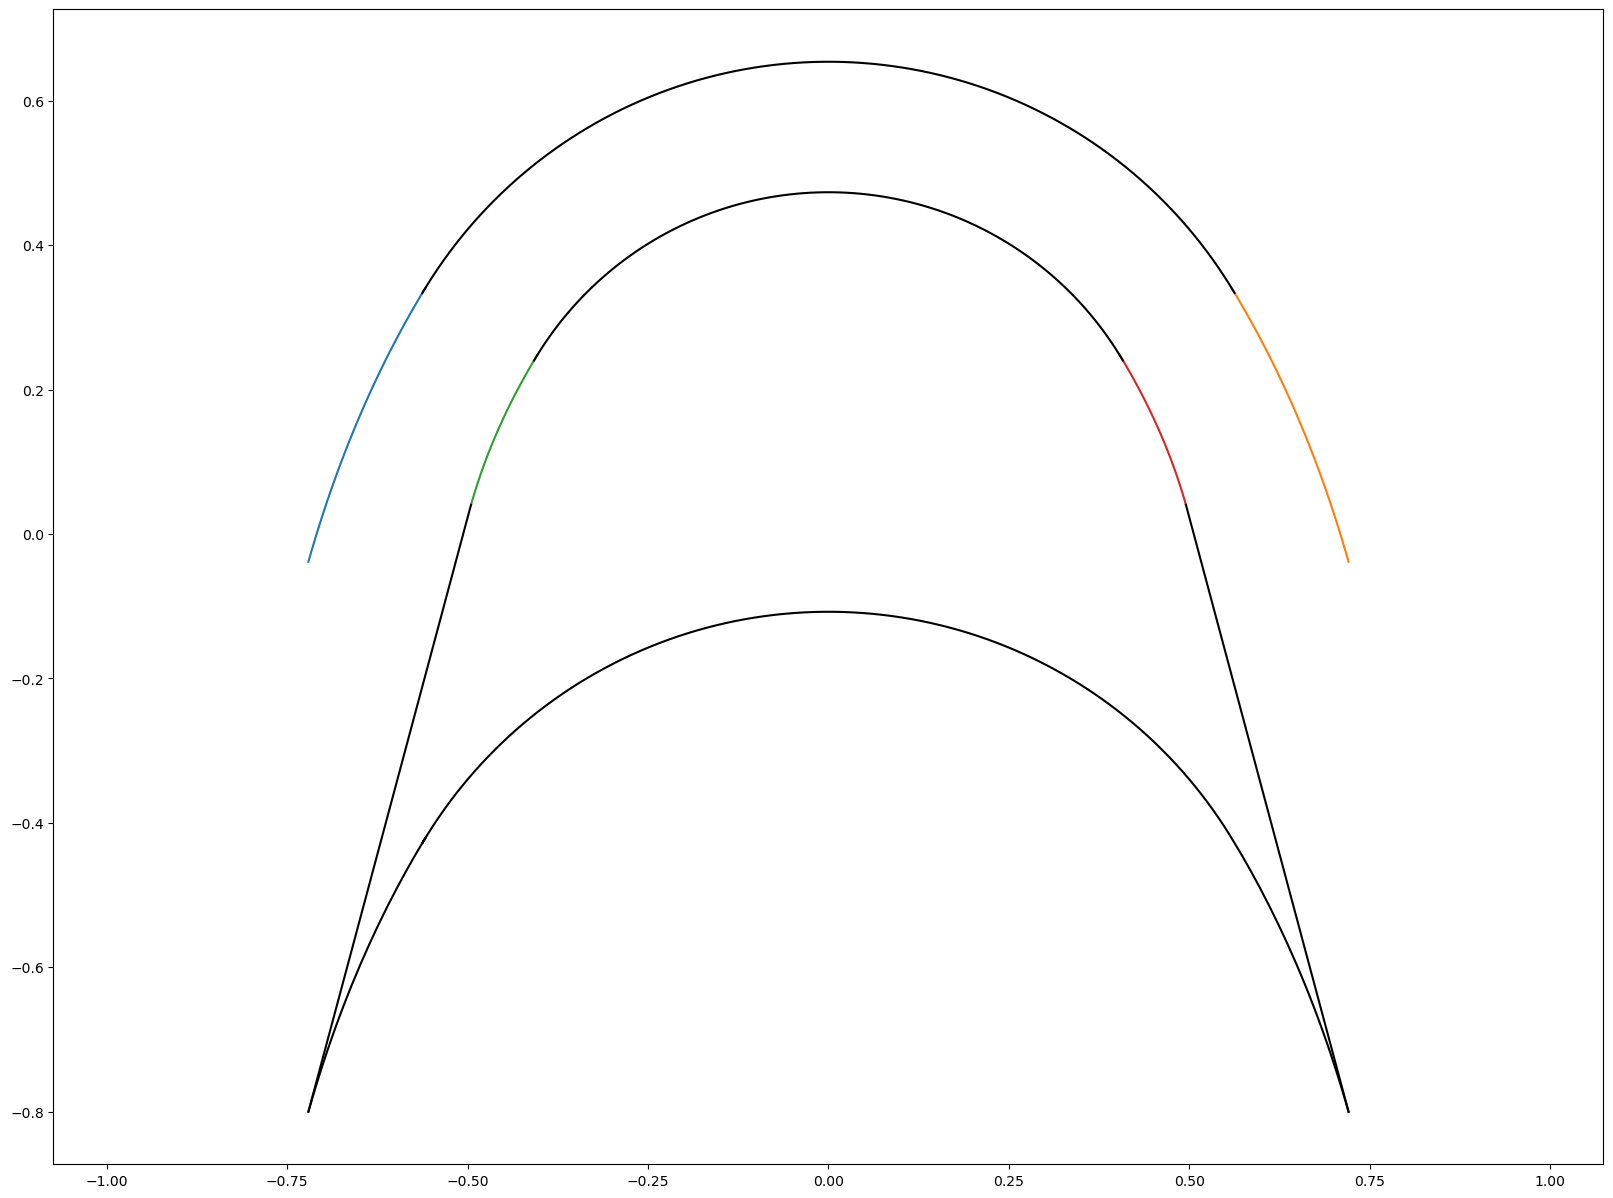

Inputs:
  Gamma:               1.13      
  Mach Inlet:          2         
  Mach Outlet:         2         
  Mach Lower:          1.6       
  Mach Upper:          2.4       
  nu_inlet:            0.5894     rad, 33.77      deg
  nu_outlet:           0.5894     rad, 33.77      deg
  nu_lower:            0.3158     rad, 18.09      deg
  nu_upper:            0.86       rad, 49.28      deg
  Beta Inlet:          1.309      rad, 75         deg
  Beta Outlet:         -1.309     rad, -75        deg
  Alpha Lower Inlet:   1.035      rad, 59.32      deg
  Alpha Lower Outlet:  -1.583     rad, -90.68     deg
  Alpha Upper Inlet:   1.038      rad, 59.5       deg
  Alpha Upper Outlet:  -1.58      rad, -90.5      deg
Results:
  R_lower:             0.6541    
  R_upper:             0.4733    
  chord:               1.441     
  lower arc x:         -0.7204    
  lower arc y:         -0.03851   
  upper arc x:         -0.4952    
  upper arc y:         0.04029    


In [14]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Specific heat ratio
gamma = 1.13

# Function to calculate M* (Mach number)
def Mstar(M):
    return np.sqrt(((gamma + 1) / 2 * M**2) / (1 + (gamma - 1) / 2 * M**2))

# Function to calculate Prandtl-Meyer function
def nu(M):
    return (np.pi / 4 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) + 
            0.5 * (np.sqrt((gamma + 1)/(gamma - 1)) * np.arcsin((gamma - 1) * Mstar(M)**2 - gamma) + 
            np.arcsin((gamma + 1)/Mstar(M)**2 - gamma)))

# Initial Mach numbers
Mach_inlet = 2
Mach_outlet = Mach_inlet
Mach_lower = 1.6
Mach_upper = 2.4    

# Calculate Prandtl-Meyer function values for given Mach numbers
nu_inlet = nu(Mach_inlet)
nu_outlet = nu(Mach_outlet)
nu_lower = nu(Mach_lower)
nu_upper = nu(Mach_upper)

# Blade angles in radians
beta_inlet = np.deg2rad(75)
beta_outlet = -beta_inlet

# Calculate flow angles
alpha_lower_inlet = beta_inlet - (nu_inlet - nu_lower)
alpha_lower_outlet = beta_outlet - (nu_outlet - nu_lower)
alpha_upper_inlet = beta_inlet - (nu_upper - nu_inlet)
alpha_upper_outlet = beta_outlet - (nu_upper - nu_outlet)

# Function to calculate u_i
u_i = lambda Rstar: -np.arcsin(np.sqrt(0.5*(gamma+1)*Rstar**2 - 0.5*(gamma-1)))

# Initial conditions for lower flow
phi_k1 = 0
Rlk1 = 1 / Mstar(Mach_lower)
u_i_k1 = u_i(Rlk1)

ylstar_k1 = Rlk1
xlstar_k1 = 0

xn_lower_flow = []
yn_lower_flow = []
xn_lower_flow_k = []
yn_lower_flow_k = []

# Lists to store coordinates
x_lower_flow = []
y_lower_flow = []
x_lower_flow_k = []
y_lower_flow_k = []

xn_upper_flow = []
yn_upper_flow = []
xn_upper_flow_k = []
yn_upper_flow_k = []

# Lists to store coordinates for upper flow
x_upper_flow = []
y_upper_flow = []
x_upper_flow_k = []
y_upper_flow_k = []

# Step size for iteration
dv = 0.01

# Safe arcsin function to avoid domain errors
def safe_asin(x):
    return np.arcsin(np.clip(x, -1, 1))

# Iterate to calculate lower flow coordinates
for k in range(int(np.ceil((nu_inlet - nu_lower)/dv)), 0, -1):
    phi_k = nu_inlet - nu_lower - (k) * dv # added one to k to fix indexing
    fRkstar = 2 * nu_inlet - np.pi / 2 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) - 2 * (k) * dv # added one to k to fix indexing
    f = lambda Rstar: (np.sqrt((gamma + 1)/(gamma - 1)) * safe_asin((gamma - 1)/ Rstar**2 - gamma) + safe_asin((gamma + 1) * Rstar**2 - gamma) - fRkstar)
    Rstar = fsolve(f, 0.9)[0]
    xkstar = -Rstar * np.sin(phi_k)
    ykstar = Rstar * np.cos(phi_k)

    u_i_k = u_i(Rstar)
    mi_k = np.tan(0.5 * (phi_k + phi_k1) + 0.5 * (u_i_k + u_i_k1))
    mbar_k = np.tan(phi_k1)
    xstar_l = ((ylstar_k1 - mbar_k * xlstar_k1) - (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)
    ystar_l =  (mi_k *(ylstar_k1 - mbar_k * xlstar_k1) - mbar_k * (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)

    phi_k1 = phi_k
    u_i_k1 = u_i_k
    xlstar_k1 = xstar_l
    ylstar_k1 = ystar_l

    x_lower_flow.append(xstar_l * np.cos(alpha_lower_inlet) - ystar_l * np.sin(alpha_lower_inlet))
    y_lower_flow.append(xstar_l * np.sin(alpha_lower_inlet) + ystar_l * np.cos(alpha_lower_inlet))
    x_lower_flow_k.append(xkstar * np.cos(alpha_lower_inlet) - ykstar * np.sin(alpha_lower_inlet))
    y_lower_flow_k.append(ykstar * np.cos(alpha_lower_inlet) + xkstar * np.sin(alpha_lower_inlet))

    xn_lower_flow.append(xstar_l)
    yn_lower_flow.append(ystar_l)
    xn_lower_flow_k.append(xkstar)
    yn_lower_flow_k.append(ykstar)

# Function to calculate u_i for upper flow
u_i = lambda Rstar: np.arcsin(np.sqrt(0.5*(gamma+1)*Rstar**2 - 0.5*(gamma-1)))

# Initial conditions for upper flow
phi_k1 = 0
Rlk1 = 1 / Mstar(Mach_upper)
u_i_k1 = u_i(Rlk1)

ylstar_k1 = Rlk1
xlstar_k1 = 0


# Iterate to calculate upper flow coordinates
for k in range(int(np.ceil((nu_upper - nu_inlet)/dv)), 0, -1):
    phi_k = nu_upper - nu_inlet - (k) * dv
    fRkstar = 2 * nu_inlet - np.pi / 2 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) + 2 * (k) * dv
    f = lambda Rstar: (np.sqrt((gamma + 1)/(gamma - 1)) * safe_asin((gamma - 1)/ Rstar**2 - gamma) + safe_asin((gamma + 1) * Rstar**2 - gamma) - fRkstar)
    Rstar = fsolve(f, 0.5)[0]
    xkstar = -Rstar * np.sin(phi_k)
    ykstar = Rstar * np.cos(phi_k)

    u_i_k = u_i(Rstar)
    mi_k = np.tan(0.5 * (phi_k + phi_k1) + 0.5 * (u_i_k + u_i_k1))
    mbar_k = np.tan(phi_k1)
    xstar_l = ((ylstar_k1 - mbar_k * xlstar_k1) - (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)
    ystar_l =  (mi_k *(ylstar_k1 - mbar_k * xlstar_k1) - mbar_k * (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)

    phi_k1 = phi_k
    u_i_k1 = u_i_k
    xlstar_k1 = xstar_l
    ylstar_k1 = ystar_l

    x_upper_flow.append(xstar_l * np.cos(alpha_upper_inlet) - ystar_l * np.sin(alpha_upper_inlet))
    y_upper_flow.append(xstar_l * np.sin(alpha_upper_inlet) + ystar_l * np.cos(alpha_upper_inlet))
    x_upper_flow_k.append(xkstar * np.cos(alpha_upper_inlet) - ykstar * np.sin(alpha_upper_inlet))
    y_upper_flow_k.append(ykstar * np.cos(alpha_upper_inlet) + xkstar * np.sin(alpha_upper_inlet))

    xn_upper_flow.append(xstar_l)
    yn_upper_flow.append(ystar_l)
    xn_upper_flow_k.append(xkstar)
    yn_upper_flow_k.append(ykstar)

# Plotting the results
plt.figure(figsize=(20, 15))
# Left lower transition
plt.plot(x_lower_flow, y_lower_flow, '-')
# Right lower transition
plt.plot(-np.array(x_lower_flow), y_lower_flow, '-')
# Left upper transition
plt.plot(np.array(x_upper_flow), y_upper_flow, '-')
# Right upper transition
plt.plot(-np.array(x_upper_flow), y_upper_flow, '-')

# plt.plot(x_lower_flow_k, y_lower_flow_k, 'x-', color='red')
# plt.plot(-np.array(x_lower_flow_k), y_lower_flow_k, 'x-', color='red')
# plt.plot(np.array(x_upper_flow_k), y_upper_flow_k, 'x-', color='red')
# plt.plot(-np.array(x_upper_flow_k), y_upper_flow_k, 'x-', color='red')

# for i in range(int(np.ceil((nu_inlet - nu_lower)/dv)), 0, -1):
#     plt.plot([x_lower_flow[i-1], x_lower_flow_k[i-1]], [y_lower_flow[i-1], y_lower_flow_k[i-1]], 'k-', linewidth=0.5)
#     plt.plot([-x_lower_flow[i-1], -x_lower_flow_k[i-1]], [y_lower_flow[i-1], y_lower_flow_k[i-1]], 'k-', linewidth=0.5)
# for i in range(int(np.ceil((nu_upper - nu_inlet)/dv)), 0, -1):
#     plt.plot([x_upper_flow[i-1], x_upper_flow_k[i-1]], [y_upper_flow[i-1], y_upper_flow_k[i-1]], 'k-', linewidth=0.5)
#     plt.plot([-x_upper_flow[i-1], -x_upper_flow_k[i-1]], [y_upper_flow[i-1], y_upper_flow_k[i-1]], 'k-', linewidth=0.5)
plt.axis('equal')

Rl = 1 / Mstar(Mach_lower)
Ru = 1 / Mstar(Mach_upper)

plt.plot(Rl * np.cos(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), Rl * np.sin(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), 'k-')
plt.plot(Ru * np.cos(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), Ru * np.sin(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), 'k-')
plt.plot([x_upper_flow[-1], x_lower_flow[-1]], [y_upper_flow[-1], y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)], 'k-')
plt.plot([-x_upper_flow[-1], -x_lower_flow[-1]], [y_upper_flow[-1], y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)], 'k-')

plt.plot(np.concatenate([np.flip(np.array(x_lower_flow)), Rl * np.cos(np.linspace(np.pi/2 + alpha_lower_inlet, np.pi/2 - alpha_lower_inlet, 100)), -np.array(x_lower_flow)]), 
         np.concatenate([np.flip(np.array(y_lower_flow)), Rl * np.sin(np.linspace(np.pi/2 + alpha_lower_inlet, np.pi/2 - alpha_lower_inlet, 100)), np.array(y_lower_flow)]) - y_lower_flow[-1] + (y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)), 'k-')

plt.show()

# # Plotting the results
# plt.figure(figsize=(20, 15))
# plt.plot(xn_lower_flow, yn_lower_flow, '-')
# plt.plot(xn_upper_flow, yn_upper_flow, '-')

# plt.plot(xn_lower_flow_k, yn_lower_flow_k, '-', color='red')
# plt.plot(xn_upper_flow_k, yn_upper_flow_k, '-', color='red')

# for i in range(int(np.ceil((nu_inlet - nu_lower)/dv)), 0, -1):
#     plt.plot([xn_lower_flow[i-1], xn_lower_flow_k[i-1]], [yn_lower_flow[i-1], yn_lower_flow_k[i-1]], 'k-', linewidth=0.5)
# for i in range(int(np.ceil((nu_upper - nu_inlet)/dv)), 0, -1):
#     plt.plot([xn_upper_flow[i-1], xn_upper_flow_k[i-1]], [yn_upper_flow[i-1], yn_upper_flow_k[i-1]], 'k-', linewidth=0.5)
# plt.axis('equal')

# Rl = 1 / Mstar(Mach_lower)
# Ru = 1 / Mstar(Mach_upper)

# # plt.plot(Rl * np.cos(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), Rl * np.sin(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), 'k-')
# # plt.plot(Ru * np.cos(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), Ru * np.sin(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), 'k-')
# plt.plot([xn_upper_flow[-1], xn_lower_flow[-1]], [yn_upper_flow[-1], yn_upper_flow[-1] + (xn_lower_flow[-1] - xn_upper_flow[-1]) * np.tan(beta_inlet-alpha_upper_inlet)], 'k-')
# plt.plot([xn_upper_flow[-1], xn_lower_flow[-1]], [yn_upper_flow[-1], yn_upper_flow[-1] + (xn_lower_flow[-1] - xn_upper_flow[-1]) * np.tan(beta_inlet-alpha_upper_inlet)], 'k-')


# plt.show()

print(f"Inputs:")
print(f"  {'Gamma:':<20} {gamma:<10.4g}")
print(f"  {'Mach Inlet:':<20} {Mach_inlet:<10.4g}")
print(f"  {'Mach Outlet:':<20} {Mach_outlet:<10.4g}")
print(f"  {'Mach Lower:':<20} {Mach_lower:<10.4g}")
print(f"  {'Mach Upper:':<20} {Mach_upper:<10.4g}")
print(f"  {'nu_inlet:':<20} {nu_inlet:<10.4g} rad, {np.rad2deg(nu_inlet):<10.4g} deg")
print(f"  {'nu_outlet:':<20} {nu_outlet:<10.4g} rad, {np.rad2deg(nu_outlet):<10.4g} deg")
print(f"  {'nu_lower:':<20} {nu_lower:<10.4g} rad, {np.rad2deg(nu_lower):<10.4g} deg")
print(f"  {'nu_upper:':<20} {nu_upper:<10.4g} rad, {np.rad2deg(nu_upper):<10.4g} deg")
print(f"  {'Beta Inlet:':<20} {beta_inlet:<10.4g} rad, {np.rad2deg(beta_inlet):<10.4g} deg")
print(f"  {'Beta Outlet:':<20} {beta_outlet:<10.4g} rad, {np.rad2deg(beta_outlet):<10.4g} deg")
print(f"  {'Alpha Lower Inlet:':<20} {alpha_lower_inlet:<10.4g} rad, {np.rad2deg(alpha_lower_inlet):<10.4g} deg")
print(f"  {'Alpha Lower Outlet:':<20} {alpha_lower_outlet:<10.4g} rad, {np.rad2deg(alpha_lower_outlet):<10.4g} deg")
print(f"  {'Alpha Upper Inlet:':<20} {alpha_upper_inlet:<10.4g} rad, {np.rad2deg(alpha_upper_inlet):<10.4g} deg")
print(f"  {'Alpha Upper Outlet:':<20} {alpha_upper_outlet:<10.4g} rad, {np.rad2deg(alpha_upper_outlet):<10.4g} deg")
print(f"Results:")
print(f"  {'R_lower:':<20} {Rl:<10.4g}")
print(f"  {'R_upper:':<20} {Ru:<10.4g}")
print(f"  {'chord:':<20} {(-2 * x_lower_flow[-1]):<10.4g}")
print(f"  {'lower arc x:':<20} {x_lower_flow[-1]:<10.4g} ")
print(f"  {'lower arc y:':<20} {y_lower_flow[-1]:<10.4g} ")
print(f"  {'upper arc x:':<20} {x_upper_flow[-1]:<10.4g} ")
print(f"  {'upper arc y:':<20} {y_upper_flow[-1]:<10.4g} ") 

# dimension = 2
# print(f"x{dimension}:")
# print(f"  {'r_lower:':<20} {Rl*dimension:<10.4g}")
# print(f"  {'r_upper:':<20} {Ru*dimension:<10.4g}")
# print(f"  {'chord:':<20} {(-2 * x_lower_flow[-1])*dimension:<10.4g}")

In [32]:
print(int((nu_inlet - nu_lower)/dv))
print((nu_inlet - nu_lower)/dv)
print(np.ceil((nu_inlet - nu_lower)/dv))
print(int(np.ceil((nu_inlet - nu_lower)/dv)))

print(int((nu_upper - nu_inlet)/dv))
print((nu_upper - nu_inlet)/dv)
print(np.ceil((nu_upper - nu_inlet)/dv))
print(int(np.ceil((nu_upper - nu_inlet)/dv)))

6
6.462048899148272
7.0
7
3
3.8096681294347956
4.0
4


In [22]:
import math

def calculate_limiting_mach_numbers(M_i_star, gamma):
    """
    Calculates the limiting lower and upper surface critical velocity ratios
    (M*_l_min and M*_u_max) based on NASA TM X-2095 equations.

    Args:
        M_i_star (float): Inlet critical velocity ratio (M*_i).
        gamma (float): Specific heat ratio of the gas.

    Returns:
        tuple: (M_l_star_min, M_u_star_max)
    """
    
    # Pre-calculate common terms for efficiency and readability
    g_plus = gamma + 1
    g_minus = gamma - 1
    
    # Common term: 1 - ((gamma-1)/(gamma+1)) * (M*_i)^2
    term1 = 1 - (g_minus / g_plus) * (M_i_star**2)
    
    # Common term: (gamma/(gamma+1)) * (M*_i)^2
    term2 = (gamma / g_plus) * (M_i_star**2)
    
    # The exponent used in both equations: (gamma-1)/gamma
    exponent = g_minus / gamma

    # --- Equation 39: Minimum Lower Surface Velocity Ratio (M*_l_min) ---
    # (M*_l)_min = sqrt( (gamma+1)/(gamma-1) * {1 - [term1 * (1 + 0.5 * (term2 / term1))^(exponent)]^2} )
    # Note: The text has specific brackets. The structure is { 1 - (Term A * Term B)^2 } inside the outer sqrt.
    # Let's break down the inner bracketed part first.
    
    inner_bracket_l = term1 * (1 + 0.5 * (term2 / term1))
    # Apply the exponent to the second part of the product if strictly following standard notation precedence,
    # but looking at Eq 39 carefully: [1 - term1] * [1 + 0.5 * (term2/term1)]^exponent
    # Wait, looking at the original image of Eq 39:
    # It is sqrt( (g+1)/(g-1) * { 1 - [ (1 - ...)*(1 + 0.5*(...))^(exp) ] } )
    # Actually, typically pressure recovery equations relate total to static pressure. 
    # Let's implement exactly as written in the text image for Eq 39.
    
    # Re-evaluating Eq 39 structure from text:
    # The term inside the curly braces {} is: 1 - [ (term1) * (1 + 0.5 * (term2 / term1)) ] ^ ((g-1)/g) ??
    # No, usually these equations solve for M based on a pressure ratio limit.
    # Let's look at the structure: { 1 - [ (term1) * ( 1 + 0.5 * (...) )^exponent ] } is likely wrong relative to the square.
    # Let's simply implement the exact algebraic structure visible in Eq 39.
    
    # Eq 39 Breakdown:
    # A = 1 - (g-1)/(g+1) * M_i*^2
    # B = 1 + 0.5 * ( (gamma/(gamma+1) * M_i*^2) / A )
    # C = A * (B ** exponent)
    # M_l_star_min = sqrt( (g_plus / g_minus) * (1 - C) )
    
    # However, standard isentropic relations suggest the term C represents (p/p') or similar.
    # The equation 39 has a specific structure. Let's code it step-by-step.
    
    # Term A corresponds to (p_i/p'_i)^((g-1)/g) via isentropic relation? No, it's part of the algebraic derivation.
    val_A = 1 - (g_minus / g_plus) * (M_i_star**2)
    
    val_B_numerator = (gamma / g_plus) * (M_i_star**2)
    val_B = 1 + 0.5 * (val_B_numerator / val_A)
    
    # The combined term inside the curly braces { 1 - [...] }
    # The image shows the exponent applies to the [1 + 0.5(...)] term? 
    # Or the whole product? 
    # Looking at Eq 39 closely: [ 1 - ... ] [ 1 + ... ] ^ ((g-1)/g)
    # It appears the exponent applies to the second bracket.
    # However, physically this represents a pressure recovery limit. 
    # Let's assume the standard interpretation: The whole term [ ... ] represents the pressure ratio limit.
    
    # Actually, looking at Eq 39 in source: { 1 - (Term1) * [Term2]^exponent }
    # Wait, checking Eq 38a: p/p' = (1 - (g-1)/(g+1)M*^2)^(g/(g-1)).
    # So Term1 is (p_i/p'_i)^(g/(g-1))? No.
    # Let's just code the visual representation strictly.
    
    term_M_l_inner = val_A * (val_B ** exponent)
    
    # However, there is a potential ambiguity on if the first bracket is raised to a power.
    # Eq 38a shows p/p' related to M*. 
    # The separation criterion is (p_max - p)/q = 1/2.
    # This leads to the specific form. 
    # Let's proceed with the visual structure:
    # { 1 - (val_A) * (val_B ** exponent) }
    
    # BUT, looking at the square root at the end.
    # Velocity *usually* involves a square root. 
    # The leading term sqrt((g+1)/(g-1)) suggests solving for M* from (1 - ...)
    # The equation is M* = sqrt( (g+1)/(g-1) * (1 - PressureRatioTerm) )
    # Where PressureRatioTerm = (p/p')^((g-1)/g)
    # So the term inside {} must evaluate to (1 - (p/p')^((g-1)/g)).
    
    # In Eq 39, the term subtracted from 1 is:
    # [1 - (g-1)/(g+1) M*^2] * [1 + 0.5 * (...)]^((g-1)/g)
    # Wait, [1 - (g-1)/(g+1) M*^2] is (p/p')^((g-1)/g).
    # So we have (p/p')_static * [RecoveryFactor]^((g-1)/g).
    # This matches the physics.
    
    # Let's check the power on the first bracket [1 - (g-1)/(g+1) M*^2].
    # In Eq 39 image, there is NO exponent visible on the first bracket.
    # However, logically, if it represents pressure, it usually carries the exponent.
    # BUT, if we look at Eq 38a, the term (1 - ... M*^2) is (p/p')^((g-1)/gamma).
    # Wait, Eq 38a says p/p' = (1 - ...)^(gamma/(gamma-1)). 
    # So (p/p')^((gamma-1)/gamma) = (1 - ...).
    # So the first bracket IS the pressure term already raised to the power (g-1)/g.
    # Therefore, no extra exponent is needed on the first bracket.
    
    # Correct implementation of Eq 39:
    term_l_combined = val_A * (val_B ** exponent)
    
    # Check for negative value before sqrt
    if 1 - term_l_combined < 0:
        raise ValueError("Inputs result in imaginary Lower Surface Mach Number")
        
    M_l_star_min = math.sqrt((g_plus / g_minus) * (1 - term_l_combined))


    # --- Equation 40: Maximum Upper Surface Velocity Ratio (M*_u_max) ---
    # Structure is very similar, but the second term is in the denominator (or inverse).
    # { 1 - [term1] * [ 1 / (1 + 0.5 * (term2/term1)) ]^exponent }
    
    # val_A and val_B are the same as above.
    # The term is val_A * ( (1 / val_B) ** exponent ) or val_A * (val_B ** -exponent)
    
    term_u_combined = val_A * ((1.0 / val_B) ** exponent)
    
    if 1 - term_u_combined < 0:
        raise ValueError("Inputs result in imaginary Upper Surface Mach Number")

    M_u_star_max = math.sqrt((g_plus / g_minus) * (1 - term_u_combined))

    return M_l_star_min, M_u_star_max

# Example Usage:
# gamma = 1.13
# M_in = 2.0
# First, convert M_in to M*_in using Equation 2
# M*_in = sqrt( ((gamma+1)/2 * M^2) / (1 + (gamma-1)/2 * M^2) )

def convert_mach_to_critical(M, gamma):
    numerator = ((gamma + 1) / 2) * (M**2)
    denominator = 1 + ((gamma - 1) / 2) * (M**2)
    return math.sqrt(numerator / denominator)

def convert_critical_to_mach(M_star, gamma):
    # Inverse of Eq 2
    # M^2 = (2 * M*^2) / ( (gamma+1) - (gamma-1)*M*^2 )
    numerator = 2 * (M_star**2)
    denominator = (gamma + 1) - (gamma - 1) * (M_star**2)
    if denominator <= 0:
        return float('inf')
    return math.sqrt(numerator / denominator)

# Calculation
g = 1.13
M_input = 2.0
M_i_star = convert_mach_to_critical(M_input, g)

try:
    Ml_star, Mu_star = calculate_limiting_mach_numbers(M_i_star, g)
    Ml = convert_critical_to_mach(Ml_star, g)
    Mu = convert_critical_to_mach(Mu_star, g)
    
    print(f"Inputs: M_in={M_input}, Gamma={g}")
    print(f"Minimum Lower Surface Mach (Ml): {Ml:.4f}")
    print(f"Maximum Upper Surface Mach (Mu): {Mu:.4f}")
    
except ValueError as e:
    print(f"Error: {e}")

Inputs: M_in=2.0, Gamma=1.13
Minimum Lower Surface Mach (Ml): 1.5444
Maximum Upper Surface Mach (Mu): 2.4004
